# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Robin Lang*
* *Kim Lan Phan Hoang*
* *Julien Harbulot*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [141]:
import epidemics_helper
import json
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.readwrite import json_graph

import operator
import math

In [142]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [143]:
file = open("../data/nyc_augmented_network.json")
file_json = json.load(file)
G = json_graph.node_link_graph(file_json)

sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

num_nodes = nx.number_of_nodes(G)

Epidemic stopped after 103.33 days | 103.33 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [144]:
def SIR(t, inf, rec, N):
    I = 0
    S = 0
    R = 0
    
    for i in range(N):
        if inf[i] < t:
            I += 1
        else:
            S += 1
        
        if rec[i] < t:
            I -= 1
            R += 1
    return (S, I, R)

In [5]:
graph_points = 500

X = np.arange(0, 100, 100/graph_points)
INF = np.zeros(graph_points)
SUSC = np.zeros(graph_points)
REC = np.zeros(graph_points)
for i in range(graph_points):
    curr = SIR(X[i], sir.inf_time, sir.rec_time, num_nodes)
    
    SUSC[i] = curr[0]
    INF[i] = curr[1]
    REC[i] = curr[2]

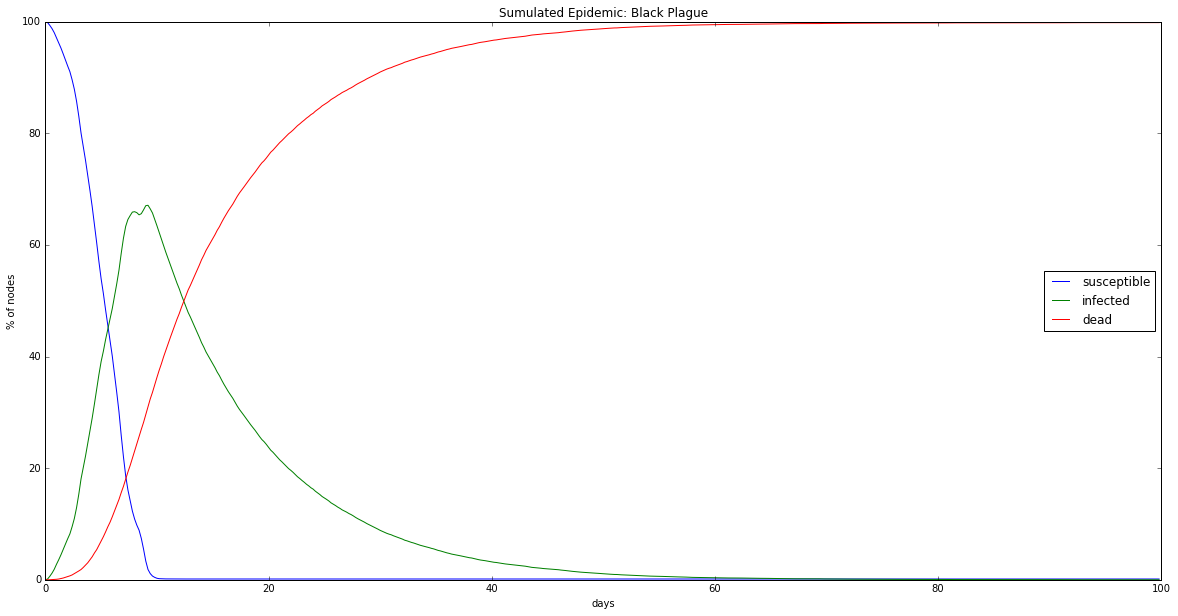

In [6]:
plt.plot(X, SUSC/num_nodes*100, label="susceptible")
plt.plot(X, INF/num_nodes*100, label="infected")
plt.plot(X, REC/num_nodes*100, label="dead")
plt.legend(loc='center right', frameon=True)
plt.xlabel("days")
plt.ylabel("% of nodes")
plt.title("Sumulated Epidemic: Black Plague")
plt.show()

In [7]:
def find_min_infected(p):
    index = 0
    while (index < graph_points-1) & (INF[index]/num_nodes < p/100):
        index += 1

    if (INF[index]/num_nodes < p/100):
        print(p, "% are never infected")
    else:
        print(p, "% are infected after", index*100/graph_points, "days")

def find_min_dead(p):
    index = 0
    while (index < graph_points-1) & (REC[index]/num_nodes < p/100):
        index += 1

    if (REC[index]/num_nodes < p/100):
        print(p, "% are never dead")
    else:
        print(p, "% are dead after", index*100/graph_points, "days")

In [8]:
find_min_infected(60)
find_min_dead(60)

60 % are infected after 7.0 days
60 % are dead after 14.8 days


In [9]:
def draw_SIR(d, inf, rec, N):
    print("after", d, "days:")
        
    # Initialize data structures
    nodes = file_json['nodes']
    pos = []
    susceptible = []
    infected = []
    recovered = []

    # Collect the labels and assign the nodes to clubs
    for n in range(N):
        coord = nodes[n]['coordinates']
        pos.append((coord[0], coord[1]))
        if (inf[n] > d):
            susceptible.append(n)
        elif (rec[n] < d):
            recovered.append(n)
        else:
            infected.append(n)

    # Draw the network
    #nx.draw_networkx_edges(G, pos, edge_size=0.1, alpha=0.3)

    susc_nodes = nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_color='b', node_size=5)
    susc_nodes.set_edgecolor('b')

    inf_nodes = nx.draw_networkx_nodes(G, pos, nodelist=infected, node_color='g', node_size=5)
    inf_nodes.set_edgecolor('g')

    rec_nodes = nx.draw_networkx_nodes(G, pos, nodelist=recovered, node_color='r', node_size=5)
    rec_nodes.set_edgecolor('r')
    
    plt.axis('off');


after 1 days:


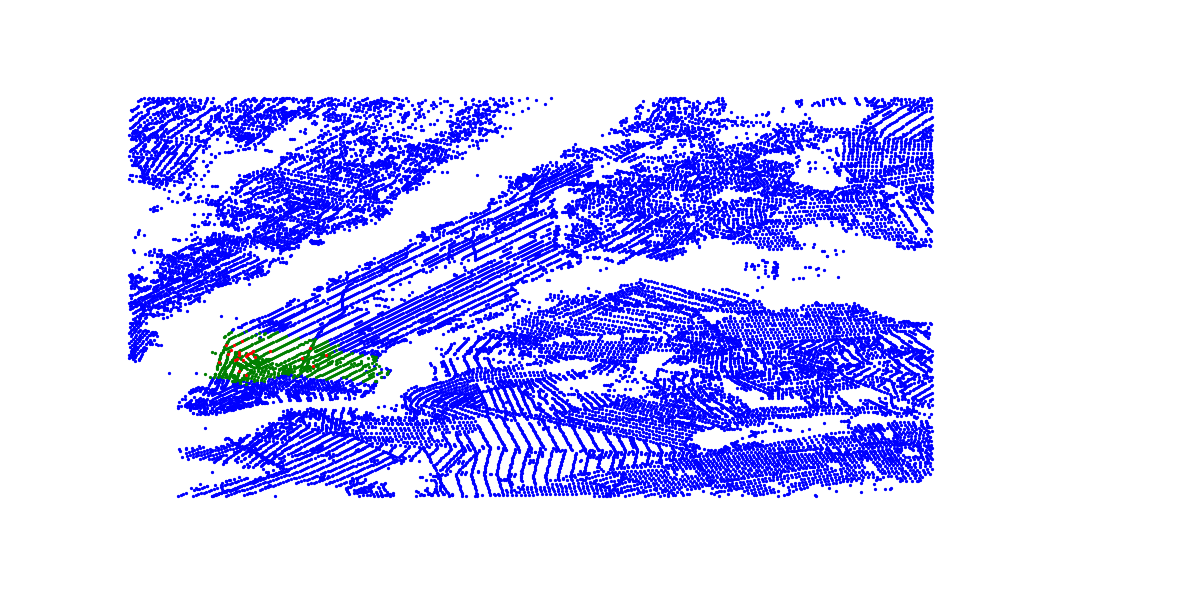

In [10]:
draw_SIR(1, sir.inf_time, sir.rec_time, num_nodes)

after 3 days:


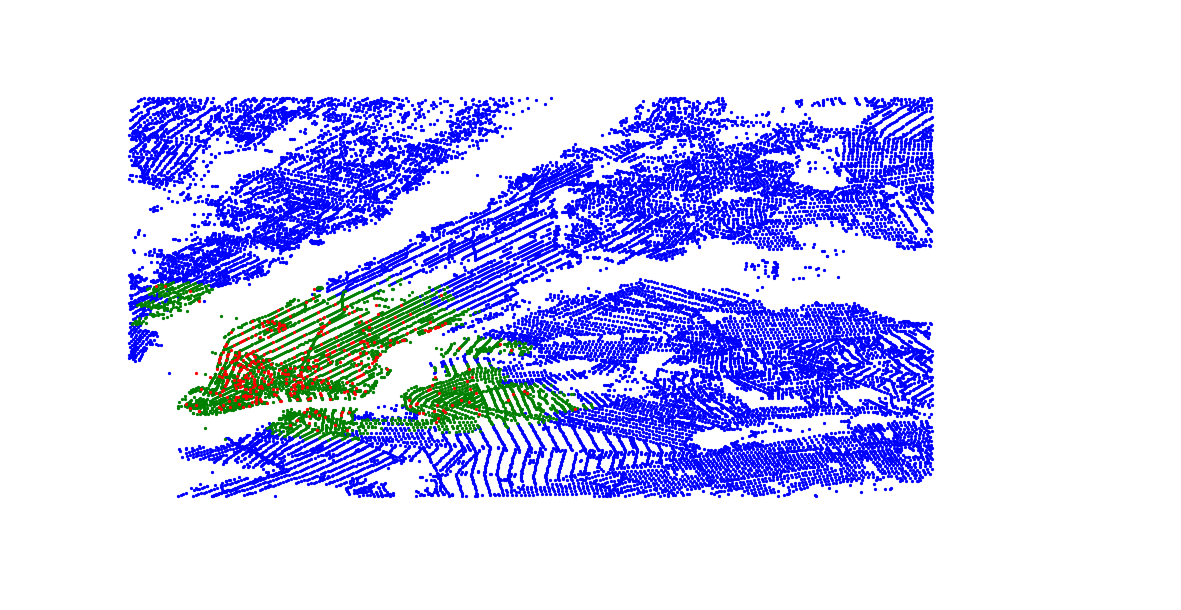

In [11]:
draw_SIR(3, sir.inf_time, sir.rec_time, num_nodes)

after 30 days:


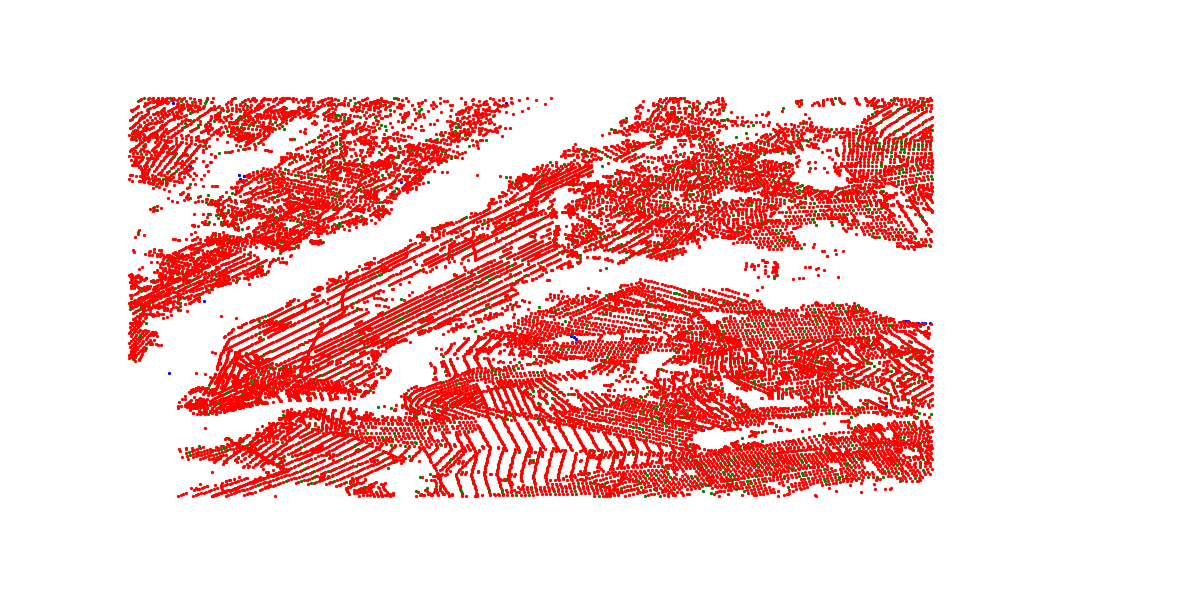

In [12]:
draw_SIR(30, sir.inf_time, sir.rec_time, num_nodes)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [52]:
def average(l):
    return sum(l) / float(len(l))

In [14]:
def strategy1(numberRuns, numberEdgesToRemove, days):
    
    rec = []
    inf = []
    sus = []

    nG = json_graph.node_link_graph(file_json)
    randomEdges = random.sample(nG.edges(), numberEdgesToRemove) #sample of 1000 edges to remove
    nG.remove_edges_from(randomEdges)


    for i in range(numberRuns):
        randomNode = random.choice(nG.nodes())
        print("random node : ", randomNode)
        sir = epidemics_helper.SimulationSIR(nG, beta=10.0, gamma=0.1)
        sir.launch_epidemic(source=randomNode, max_time=100.0)
        res = SIR(days, sir.inf_time, sir.rec_time, num_nodes)
        rec.append(res[2])
        inf.append(res[1])
        sus.append(res[0])
        
    return(sus, inf, rec)

In [15]:
s,i,r = strategy1(5, 1000, 30)
print("------------------------------------------------------------------------------------")
print("Average people susceptible without 1000 random edges after 30 days : ",average(s))
print("Average people infected without 1000 random edges after 30 days : ",average(i))
print("Average people recovered without 1000 random edges after 30 days : ",average(r))

random node :  16064
Epidemic stopped after 103.36 days | 103.36 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
random node :  8156
Epidemic stopped after 94.12 days | 94.12 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
random node :  21735
Epidemic stopped after 124.04 days | 124.04 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
random node :  19633
Epidemic stopped after 101.54 days | 101.54 days elapsed | 0.2% susceptible, 0.0% infected, 99.7% recovered
random node :  11425
Epidemic stopped after 106.37 days | 106.37 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
------------------------------------------------------------------------------------
Average people susceptible without 1000 random edges after 30 days :  89.8
Average people infected without 1000 random edges after 30 days :  2525.2
Average people recovered without 1000 random edges after 30 days :  23866.0


In [16]:
s1,i1,r1 = strategy1(5, 10000, 30)
print("------------------------------------------------------------------------------------")
print("Average people susceptible without 10000 random edges after 30 days : ",average(s1))
print("Average people infected without 10000 random edges after 30 days : ",average(i1))
print("Average people recovered without 10000 random edges after 30 days : ",average(r1))

random node :  26321
Epidemic stopped after 104.75 days | 104.75 days elapsed | 24.2% susceptible, 0.0% infected, 75.8% recovered
random node :  3966
Epidemic stopped after 104.98 days | 104.98 days elapsed | 24.5% susceptible, 0.0% infected, 75.5% recovered
random node :  19560
Epidemic stopped after 4.62 days | 4.62 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
random node :  19033
Epidemic stopped after 101.13 days | 101.13 days elapsed | 84.6% susceptible, 0.0% infected, 15.4% recovered
random node :  318
Epidemic stopped after 7.43 days | 7.43 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
------------------------------------------------------------------------------------
Average people susceptible without 10000 random edges after 30 days :  17650.4
Average people infected without 10000 random edges after 30 days :  1755.8
Average people recovered without 10000 random edges after 30 days :  7074.8


#### Exercise 2.11: Strategy 2

The best strategy would be to divide our graph into connected components, so that the pandemic is constrained only in a part of the graph. Since the graph is a unique big connected component, we divide the whole graph by deleting edges which are contained in the shortest paths linking nodes whose degree are high. This works because these high degree nodes are far from each other and thus offer a nice slicing of the graph. 

In [193]:
# delete shortest path from degree one to max degree -> want to form isolated island

def strategy22(numberRuns, numberEdgesToRemove, days):
    
    rec = []
    inf = []
    sus = []
    
    G = json_graph.node_link_graph(file_json)
    degree_sequence=nx.degree(G) # degree sequence
    s = sorted(degree_sequence.items(), key=operator.itemgetter(1))
    count = 0
    
    while (numberEdgesToRemove > 0):
        source = s[count][0]
        target = s[-count-1][0]
        
        # remove shortest path between high degree nodes
        if(nx.has_path(G,source=source,target=target)):
            toRemove = (nx.shortest_path(G,source=source,target=target))
            numberEdgesToRemove -= len(toRemove)
            
            # if the path is longer than the remaining removable edges, we only delete the first ones 
            if(numberEdgesToRemove < 0) :
                toRemove = toRemove[:(-numberEdgesToRemove)]
            
            i=0
            while ((i+1 < len(toRemove))):
                G.remove_edge(toRemove[i],toRemove[i+1])
                i+=1
                
        count+=2


    for i in range(numberRuns):
        randomNode = random.choice(G.nodes())
        print("random node : ", randomNode)
        sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
        sir.launch_epidemic(source=randomNode, max_time=100.0)
        res = SIR(days, sir.inf_time, sir.rec_time, num_nodes)
        sus.append(res[0])
        inf.append(res[1])
        sus.append(res[0])
        
    return(sus, inf, res)

In [194]:
# delete shortest path between high degree nodes -> want to form isolated island

def strategy23(numberRuns, numberEdgesToRemove, days):
    
    rec = []
    inf = []
    sus = []
    
    G = json_graph.node_link_graph(file_json)
    degree_sequence=nx.degree(G) # degree sequence
    s = sorted(degree_sequence.items(), key=operator.itemgetter(1)) # sort nodes depending on their degree
    count = 0
    
    while (numberEdgesToRemove > 0):
        source = s[-count][0]
        target = s[-count-1][0]
        
        # remove shortest path between high degree nodes
        if(nx.has_path(G,source=source,target=target)): 
            toRemove = (nx.shortest_path(G,source=source,target=target))
            numberEdgesToRemove -= len(toRemove)
            
            # if the path is longer than the remaining removable edges, we only delete the first ones 
            if(numberEdgesToRemove < 0) :
                toRemove = toRemove[:(-numberEdgesToRemove)]
            
            i=0
            while ((i+1 < len(toRemove))):
                G.remove_edge(toRemove[i],toRemove[i+1])
                i+=1
        count+=2


    for i in range(numberRuns):
        randomNode = random.choice(G.nodes())
        print("random node : ", randomNode)
        sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
        sir.launch_epidemic(source=randomNode, max_time=100.0)
        res = SIR(days, sir.inf_time, sir.rec_time, num_nodes)
        sus.append(res[0])
        inf.append(res[1])
        sus.append(res[0])
        
    return(sus, inf, res)

In [195]:
s2,i2,r2 = strategy22(10, 2500, 30)

print("------------------------------------------------------------------------------------")
print("Average people susceptible without 2500 random edges after 30 days : ",average(s2)*100/nx.number_of_nodes(G),"%")

s2,i2,r2 = strategy23(10, 2500, 30)

print("------------------------------------------------------------------------------------")
print("Average people susceptible without 2500 random edges after 30 days : ",average(s2)*100/nx.number_of_nodes(G),"%")

random node :  25114
Epidemic stopped after 116.34 days | 116.34 days elapsed | 56.1% susceptible, 0.0% infected, 43.8% recovered
random node :  7224
Epidemic stopped after 102.88 days | 102.88 days elapsed | 56.3% susceptible, 0.0% infected, 43.6% recovered
random node :  633
Epidemic stopped after 98.72 days | 98.72 days elapsed | 56.1% susceptible, 0.0% infected, 43.9% recovered
random node :  5141
Epidemic stopped after 99.34 days | 99.34 days elapsed | 82.9% susceptible, 0.0% infected, 17.1% recovered
random node :  5307
Epidemic stopped after 78.02 days | 78.02 days elapsed | 82.9% susceptible, 0.0% infected, 17.1% recovered
random node :  11193
Epidemic stopped after 102.48 days | 102.48 days elapsed | 56.2% susceptible, 0.0% infected, 43.8% recovered
random node :  1013
Epidemic stopped after 109.65 days | 109.65 days elapsed | 56.2% susceptible, 0.0% infected, 43.8% recovered
random node :  22198
Epidemic stopped after 135.01 days | 135.01 days elapsed | 83.2% susceptible, 0.0